Dependencies Installation

In [1]:
!pip install streamlit ultralytics opencv-python pillow numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

Saved Model Uplload

In [2]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
MODEL_PATH = "ppe_detector.pt"  # Ensure your trained model is in the same directory
model = YOLO(MODEL_PATH)

# Check if the model loads correctly
print("✅ Model Loaded Successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Model Loaded Successfully!


Person Identification and PPE detection(Helmet)

People model class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67:

Saving bigstock-First-Aid-Support-Accident-At-451628647-1024x683.jpg to bigstock-First-Aid-Support-Accident-At-451628647-1024x683 (1).jpg

0: 448x640 2 persons, 1 boat, 1143.8ms
Speed: 6.8ms preprocess, 1143.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Total People Detected: 2

0: 448x640 2 gloves, 2 helmets, 1 no_goggles, 162.9ms
Speed: 4.6ms preprocess, 162.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Helmet Compliance Summary:
Person A: Not Complied
Person B: Complied


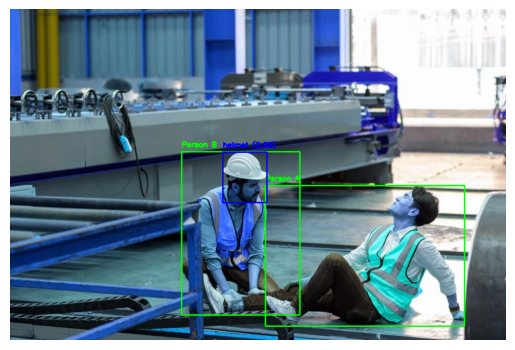

In [28]:
import torch
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files

# Load the pretrained YOLO model for people detection
people_model = YOLO("yolov8m.pt")  # YOLOv8 Medium for general object detection
ppe_model = YOLO("ppe_detector.pt")  # Your trained model for PPE detection

# Debugging: Print available class names
print("People model class names:", people_model.names)
print("PPE model class names:", ppe_model.names)

# Function to detect people and helmets
def detect_people_helmets(image_path):
    image = Image.open(image_path)
    image = np.array(image)

    # Step 1: Detect people
    people_results = people_model(image)
    people_detections = people_results[0]

    person_boxes = []
    person_ids = {}
    person_count = 0

    for box in people_detections.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = people_model.names[int(box.cls)]
        conf = box.conf.item()

        if conf > 0.30 and label == "person":  # Confidence threshold
            person_count += 1
            person_id = f"Person {chr(64 + person_count)}"
            person_boxes.append((x1, y1, x2, y2))
            person_ids[(x1, y1, x2, y2)] = person_id
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, person_id, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    print(f"Total People Detected: {person_count}")

    # Step 2: Detect helmets on detected people
    compliance_status = {}

    ppe_results = ppe_model(image)
    for box in ppe_results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = ppe_model.names[int(box.cls)]
        conf = box.conf.item()

        if conf > 0.50 and "helmet" in label:
            color = (255, 0, 0)
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, f"{label} ({conf:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            for person_box in person_boxes:
                px1, py1, px2, py2 = person_box
                if x1 >= px1 and y1 >= py1 and x2 <= px2 and y2 <= py2:
                    person_id = person_ids[person_box]
                    compliance_status[person_id] = "Complied"

    # Print summary
    print("Helmet Compliance Summary:")
    for person in person_ids.values():
        status = compliance_status.get(person, "Not Complied")
        print(f"{person}: {status}")

    # Display result
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Prompt user to upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
detect_people_helmets(image_path)


CSV File Generation

In [34]:
import csv
import os
from datetime import datetime

# Function to save compliance results to a CSV file with timestamp
def save_compliance_to_csv(results, filename="ppe_compliance_log.csv"):
    file_exists = os.path.isfile(filename)

    with open(filename, mode="a", newline="") as file:
        writer = csv.writer(file)

        # Write headers if file is new
        if not file_exists:
            writer.writerow(["Timestamp", "Person ID", "Compliance Status"])

        # Write detection results with timestamp
        for person_id, (status) in results.items():
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  # Get current timestamp
            writer.writerow([timestamp, person_id, status])

    print(f"Compliance log saved to {filename}")

# Example usage with dummy data
compliance_results = {
    "Person A": ("Complied"),
    "Person B": ("Not Complied"),
}

save_compliance_to_csv(compliance_results)

Compliance log saved to ppe_compliance_log.csv


Streamlit deployment

In [40]:
%%writefile app.py



import torch
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import streamlit as st
import csv
import os
from datetime import datetime

# Load the pretrained YOLO model for people detection
people_model = YOLO("yolov8m.pt")  # YOLOv8 Medium for general object detection
ppe_model = YOLO("ppe_detector.pt")  # Your trained model for PPE detection

# Function to save compliance results to a CSV file with timestamp
def save_compliance_to_csv(results, filename="ppe_compliance_log.csv"):
    file_exists = os.path.isfile(filename)

    with open(filename, mode="a", newline="") as file:
        writer = csv.writer(file)

        # Write headers if file is new
        if not file_exists:
            writer.writerow(["Timestamp", "Person ID", "Compliance Status"])

        # Write detection results with timestamp
        for person_id, status in results.items():
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  # Get current timestamp
            writer.writerow([timestamp, person_id, status])

    st.success("Compliance log saved to CSV file.")

# Streamlit UI
st.title("PPE Compliance Detection")
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

def detect_people_helmets(image):
    image = np.array(image)
    image_copy = image.copy()

    # Step 1: Detect people
    people_results = people_model(image)
    people_detections = people_results[0]

    person_boxes = []
    person_ids = {}
    person_count = 0

    for box in people_detections.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = people_model.names[int(box.cls)]
        conf = box.conf.item()

        if conf > 0.30 and label == "person":  # Confidence threshold
            person_count += 1
            person_id = f"Person {chr(64 + person_count)}"

            # Increase the height by a small percentage (e.g., 10%)
            y1 = max(0, y1 - int(0.2 * (y2 - y1)))

            person_boxes.append((x1, y1, x2, y2))
            person_ids[(x1, y1, x2, y2)] = person_id
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image_copy, f"{person_id} ({conf:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Step 2: Detect helmets on detected people
    compliance_status = {}

    ppe_results = ppe_model(image)
    for box in ppe_results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = ppe_model.names[int(box.cls)]
        conf = box.conf.item()

        if conf > 0.50 and "helmet" in label:
            color = (255, 0, 0)
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image_copy, f"{label} ({conf:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            for person_box in person_boxes:
                px1, py1, px2, py2 = person_box
                if x1 >= px1 and y1 >= py1 and x2 <= px2 and y2 <= py2:
                    person_id = person_ids[person_box]
                    compliance_status[person_id] = "Complied"

    for person in person_ids.values():
        status = compliance_status.get(person, "Not Complied")
        compliance_status[person] = status

    return image_copy, person_count, compliance_status

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="PPE Compliance Image", use_column_width=True)

    processed_image, person_count, compliance_status = detect_people_helmets(image)

    st.image(processed_image, caption="Detection Results", use_column_width=True)
    st.write(f"Total People Detected: {person_count}")
    st.write("Helmet Compliance Summary:")
    for person, status in compliance_status.items():
        st.write(f"{person}: {status}")

    if st.button("Generate CSV Report"):
        save_compliance_to_csv(compliance_status)


Overwriting app.py


In [42]:
!streamlit run app.py & npx localtunnel --port 8501 --subdomain ppedetection



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.56.254:8501

⠴⠦your url is: https://ppedetection.loca.lt
2025-03-16 06:58:15.734 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 345, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 217, in get_module_paths
    potential_paths = extract_paths(module)
                      ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 210, in <lambda>
    lambda m: list(m.__path__.

In [43]:
requirements = """streamlit
torch
opencv-python
numpy
Pillow
ultralytics
matplotlib
"""

with open("requirements.txt", "w") as f:
    f.write(requirements)

print("requirements.txt file created successfully!")

requirements.txt file created successfully!
